# **# Project Title:**
**Breast Cancer Prediction Using Logistic Regression**

#**PROBLEM STATEMENT AND AIM OF THE PROJECT:**
Breast cancer is one of the most common cancers among women worldwide. Early diagnosis and accurate classification of breast cancer tumors as either malignant (cancerous) or benign (non-cancerous) are critical for effective treatment and improved survival rates.


**This project aims to develop a machine learning-based classification system using Logistic Regression to predict the nature of breast tumors based on input features derived from digitized images of fine needle aspirates (FNA) of breast masses.**


By leveraging the Breast Cancer Wisconsin Diagnostic Dataset from sklearn.datasets, the objective is to:


--> Train a logistic regression model on labeled data,

--> Evaluate its accuracy,

--> Build a predictive system that can classify new tumor samples,

--> Aid medical professionals in early detection and diagnosis.


**This solution provides a lightweight, interpretable, and efficient tool suitable for medical screening applications.**

**# Technologies:**
Python, NumPy, Pandas, Scikit-learn

# **Project Description:**
This project involves predicting whether breast cancer is malignant or benign using logistic regression.

# **Data Collection & Loading:**
- Import the Breast Cancer dataset from sklearn.
- Load the dataset into a pandas DataFrame with feature_names as columns.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
cancer_data = load_breast_cancer()
df = pd.DataFrame(data=cancer_data.data, columns=cancer_data.feature_names)

# Add target column
df['label'] = cancer_data.target


# **Exploratory Data Analysis (EDA):**
- Display the first five rows of the dataset using .head().
- Add the target column to the DataFrame and display the last five rows using .tail().
- Analyze the dataset:
- Use .shape to check the number of rows and columns.
- Use .info() for an overview of column types and non-null values.
- Check for missing values using .isnull().sum().
- Display summary statistics with .describe().
- Analyze the target variable distribution using .value_counts().

In [2]:
# Display the first five rows
print("First five rows:")
display(df.head())



First five rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# Display the last five rows
print("\nLast five rows:")
display(df.tail())




Last five rows:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [4]:
# Check the number of rows and columns
print("\nShape of the dataset:", df.shape)




Shape of the dataset: (569, 31)


In [5]:
# Overview of column types and non-null values
print("\nDataset Info:")
df.info()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness 

In [6]:

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())




Missing values per column:


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [7]:
# Display summary statistics
print("\nSummary statistics:")
display(df.describe())



Summary statistics:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [8]:

# Analyze the target variable distribution
print("\nTarget variable distribution:")
display(df['label'].value_counts())


Target variable distribution:


,count
label,
1,357
0,212


# **Summary of EDA Results**
The dataset contains 569 samples and 31 features (30 features and 1 target variable).

There are no missing values in the dataset.

The features are numerical and represent characteristics of the breast cell nuclei.

The target variable 'label' is binary, with 357 samples labeled as benign (1) and 212 samples labeled as malignant (0).

The summary statistics provide insights into the distribution of each feature, including mean, standard deviation, min, max, and quartiles.

# **Data Preprocessing**

In [9]:
X = df.drop(columns='label', axis=1)
Y = df['label']


# ***Train-Test Split***

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


# **Model Training**

In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train, Y_train)


LogisticRegression(max_iter=10000)

# **Model Evaluation**

Training Accuracy: 0.9582417582417583
Test Accuracy: 0.9649122807017544
Precision: 0.9722222222222222
Recall: 0.9722222222222222
F1 Score: 0.9722222222222222


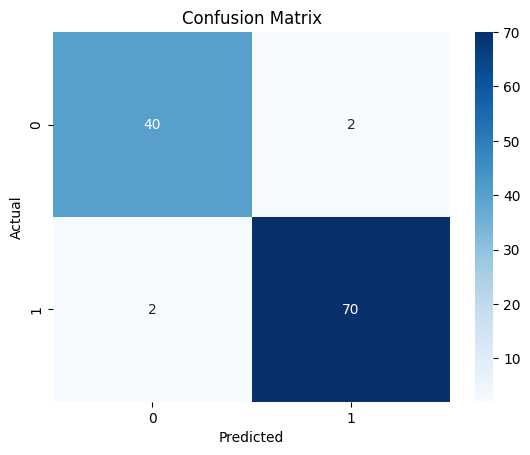

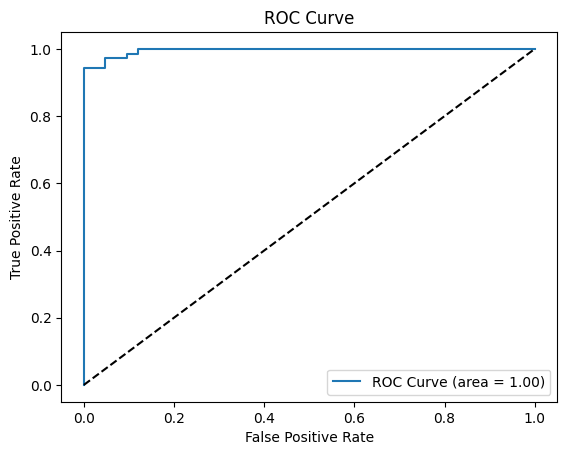

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Accuracy
print("Training Accuracy:", accuracy_score(Y_train, train_preds))
print("Test Accuracy:", accuracy_score(Y_test, test_preds))

# Other metrics
print("Precision:", precision_score(Y_test, test_preds))
print("Recall:", recall_score(Y_test, test_preds))
print("F1 Score:", f1_score(Y_test, test_preds))

# Confusion Matrix
cm = confusion_matrix(Y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


# **Model Evaluation Results Explained:**
Training Accuracy: 0.9582417582417583 Test Accuracy: 0.9649122807017544

**Accuracy:** Both training and test accuracies are high, indicating that the model performs well on both seen and unseen data. This suggests that the model is n**ot overfitting.**

Precision: 0.9722222222222222 Recall: 0.9722222222222222 F1 Score: 0.9722222222222222

**Precision:**
Of all the instances predicted as positive (benign), 97.22% were actually positive.

**Recall:** Of all the actual positive instances (benign), 97.22% were correctly identified by the model.
F1 Score: The F1 score is a harmonic mean of precision and recall, providing a balanced measure of the model's performance. A high F1 score indicates a good balance between precision and recall.

**Confusion Matrix:**

The confusion matrix visualizes the performance of a classification model.

True Positives (TP): The number of instances correctly predicted as positive (bottom right: 70).
True Negatives (TN): The number of instances correctly predicted as negative (top left: 40).
False Positives (FP): The number of instances incorrectly predicted as positive (top right: 2). These are Type I errors.
False Negatives (FN): The number of instances incorrectly predicted as negative (bottom left: 2). These are Type II errors.
In this confusion matrix:

The model correctly identified 40 malignant cases (TN).
The model correctly identified 70 benign cases (TP).
The model incorrectly predicted 2 malignant cases as benign (FN).
The model incorrectly predicted 2 benign cases as malignant (FP).
ROC Curve and AUC:

**ROC Curve (Receiver Operating Characteristic Curve):** This plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold settings. It shows the trade-off between sensitivity (TPR) and specificity (1-FPR).

**AUC (Area Under the Curve):** The AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. A higher AUC means the model is better at predicting 0s as 0s and 1s as 1s.

**AUC Value:** The AUC value of 1.00 indicates a perfect model that can perfectly distinguish between malignant and benign cases based on the current data and threshold.

**In summary:** The logistic regression model performed exceptionally well on this dataset, achieving high accuracy, precision, recall, and F1 scores on both the training and test sets. The confusion matrix shows a low number of misclassifications, and the ROC curve with an AUC of 1.00 indicates excellent discriminatory power.

# **#7. Building a Predictive System:**

In [13]:
#7. Building a Predictive System:
#- Input a sample data point:
# The model was trained on 30 features, so the input data must also have 30 features.
# This is a sample input data point with 30 features.
input_data = (13.54, 14.36, 87.46, 566.3, 0.09779, 0.08129, 0.06664, 0.04781, 0.1885, 0.05766,
              0.2699, 0.7886, 1.805, 20.19, 0.005766, 0.01483, 0.01791, 0.009579, 0.0154, 0.002443,
              15.11, 19.26, 99.71, 711.2, 0.144, 0.1773, 0.239, 0.1288, 0.2977, 0.07259)

#- Convert the input data into a NumPy array and reshape it:
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
#- Predict the output using the trained model:

prediction = model.predict(input_data_reshaped)
if (prediction[0] == 0):
  print('The Breast Cancer is Malignant')
else:
  print('The Breast Cancer is Benign')

The Breast Cancer is Benign


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
